# Setup

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from datasets.InpaintingDataset import SmilingInpaintDataset
from models.network import Generator

In [3]:
device = torch.device("cpu")

G = Generator().to(device)
checkpoint_path = 'checkpoints/G_epoch_10.pth'
G.load_state_dict(torch.load(checkpoint_path, map_location=device))
G.eval()

/var/folders/l_/t5bkgwyn43jcg4nx4rf8nmdc0000gn/T/ipykernel_89704/2768741973.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  G.load_state_dict(torch.load(checkpoint_path,

Generator(
  (model): Sequential(
    (0): Conv2d(4, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): Tanh()
  )
)

In [4]:
# transform same as used during training
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_real_root = 'data/real/smiling'  # Path to test real images
test_masked_root = 'data/masked/smiling'  # Path to test masked images
test_dataset = SmilingInpaintDataset(test_real_root, test_masked_root, transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# Visualization

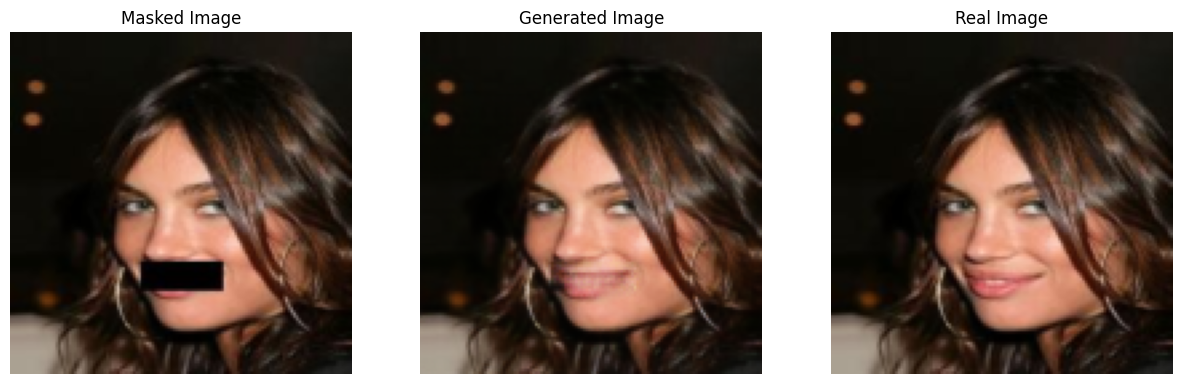

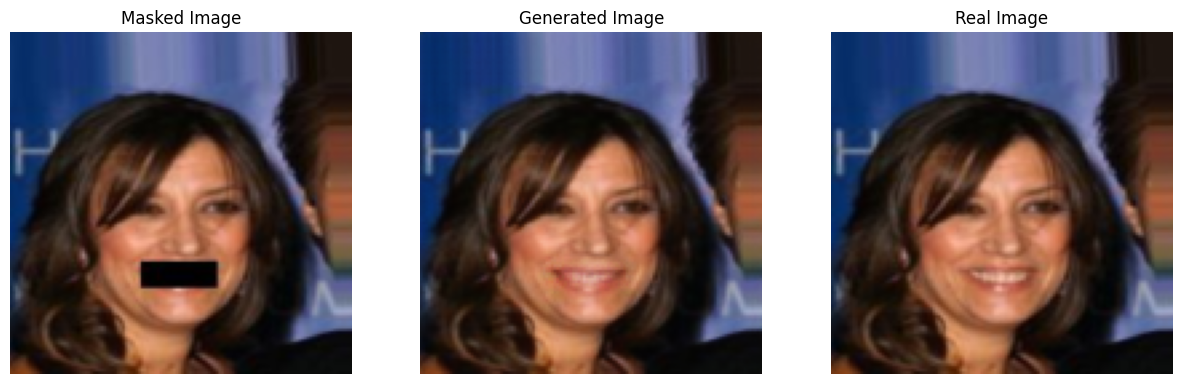

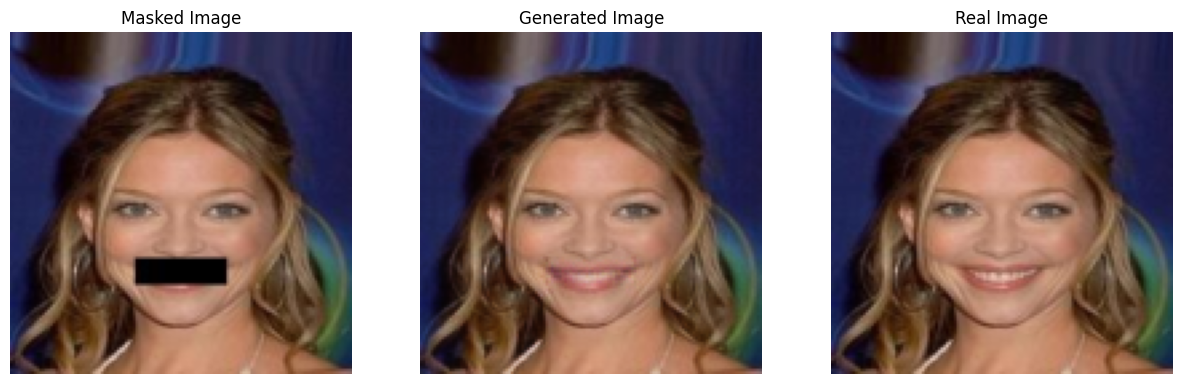

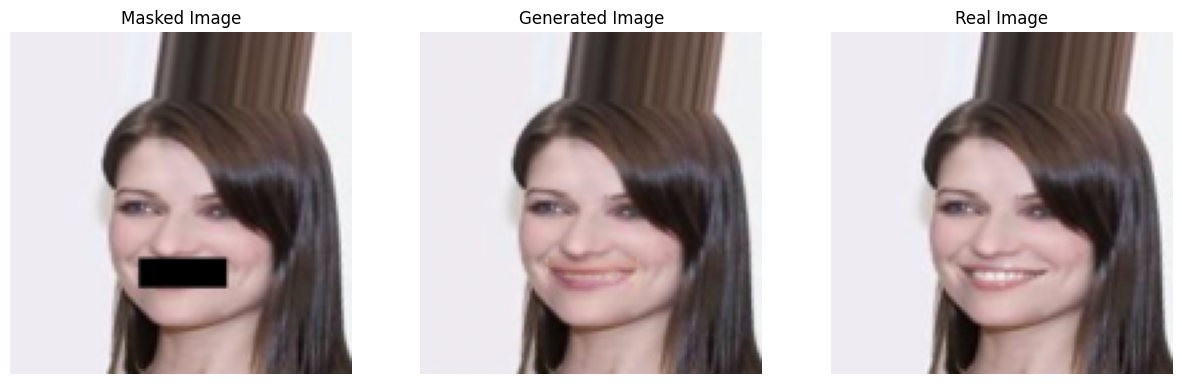

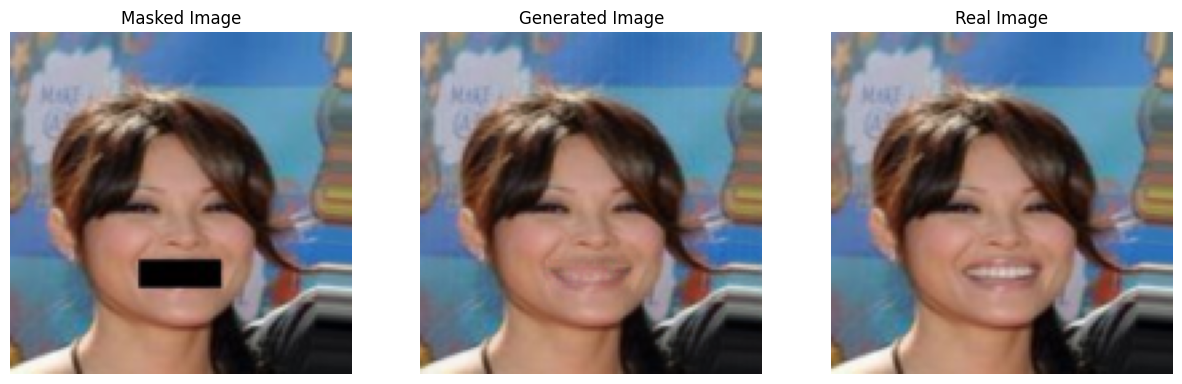

In [5]:
def visualize_results(generator, test_loader, device, num_samples=5):
    generator.eval()
    count = 0

    with torch.no_grad():
        for masked_img, mask, real_img in test_loader:
            masked_img = masked_img.to(device)
            mask = mask.to(device)
            real_img = real_img.to(device)

            generated_img = generator(masked_img, mask)

            masked_img_01 = (masked_img.cpu() + 1) / 2
            generated_img_01 = (generated_img.cpu() + 1) / 2
            real_img_01 = (real_img.cpu() + 1) / 2

            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            axes[0].imshow(masked_img_01.squeeze().permute(1, 2, 0).clamp(0, 1))
            axes[0].set_title('Masked Image')
            axes[0].axis('off')

            axes[1].imshow(generated_img_01.squeeze().permute(1, 2, 0).clamp(0, 1))
            axes[1].set_title('Generated Image')
            axes[1].axis('off')

            axes[2].imshow(real_img_01.squeeze().permute(1, 2, 0).clamp(0, 1))
            axes[2].set_title('Real Image')
            axes[2].axis('off')

            plt.show()

            count += 1
            if count >= num_samples:
                break

visualize_results(G, test_loader, device, num_samples=5)